# Day 13 Housing Project Practice

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as tt_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("housing (1).csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Numerical EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
data['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [6]:
data.shape

(20640, 10)

In [7]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Visual EDA

#### Following Geron book Chp 2

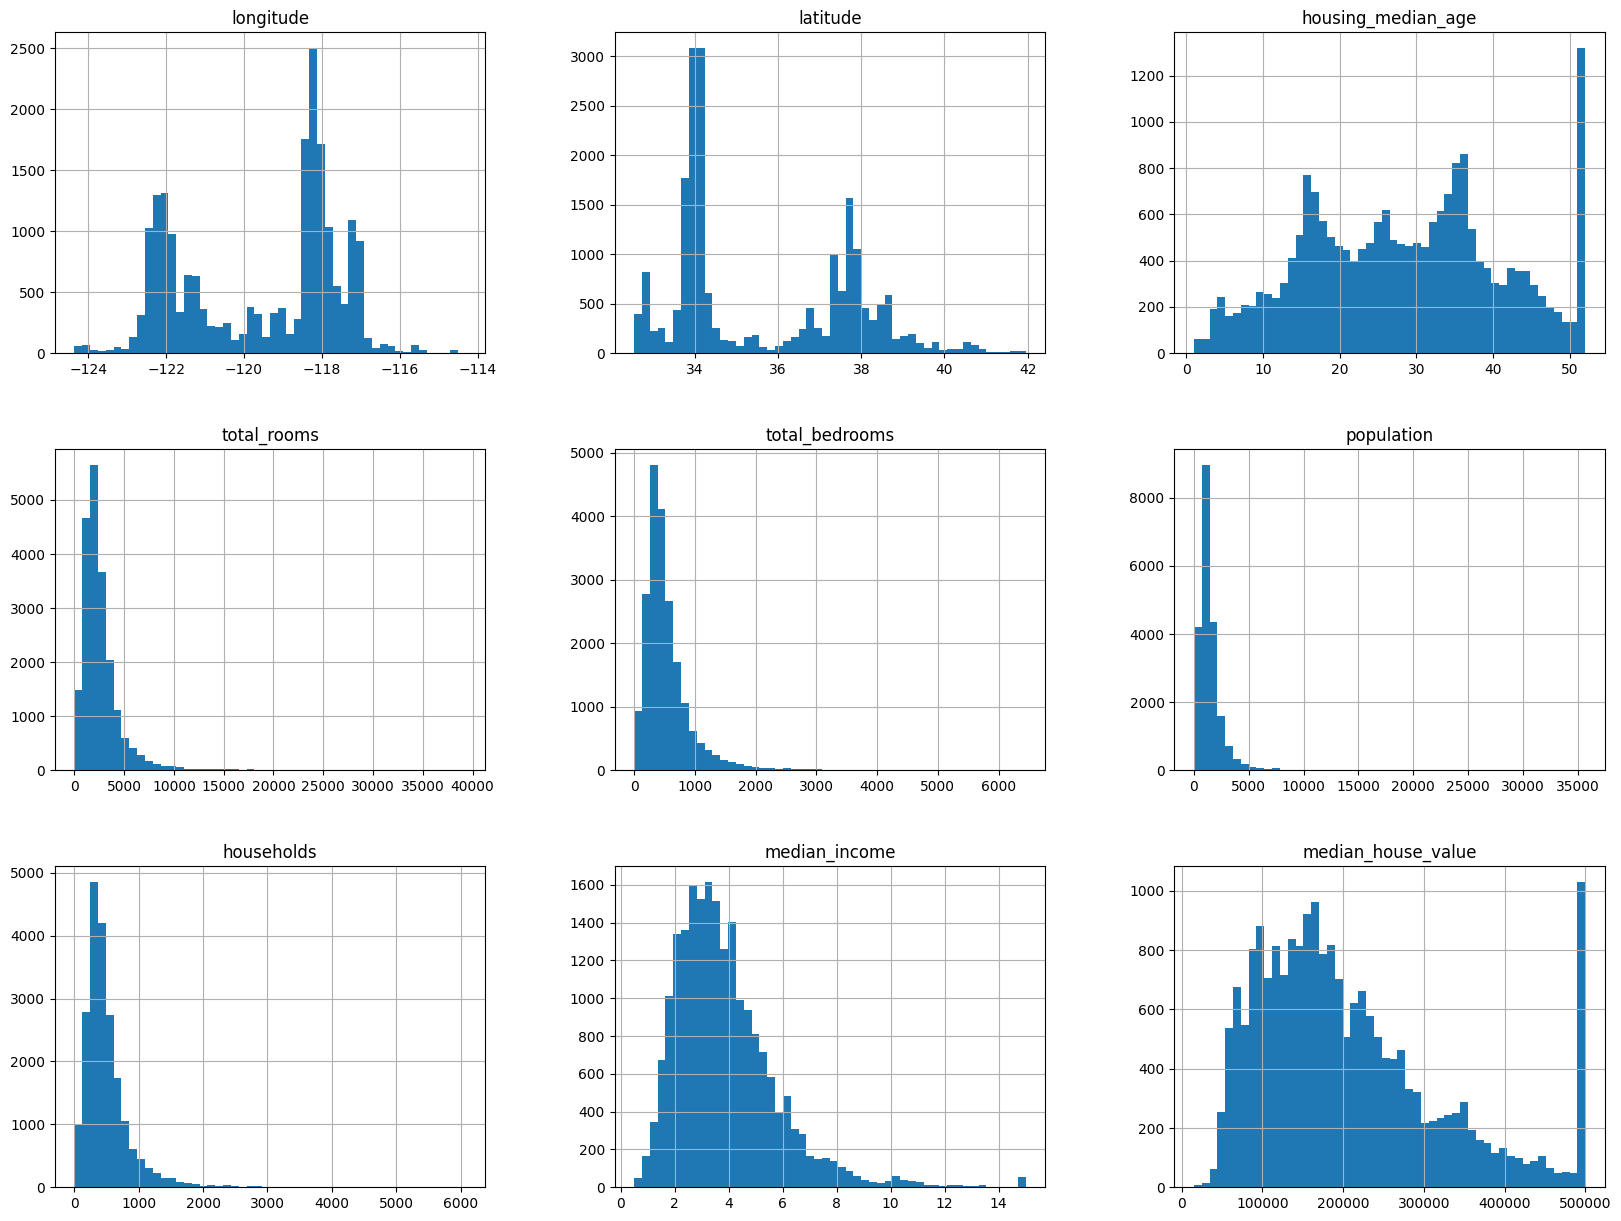

In [8]:
data.hist(bins =50, figsize=(20, 15));

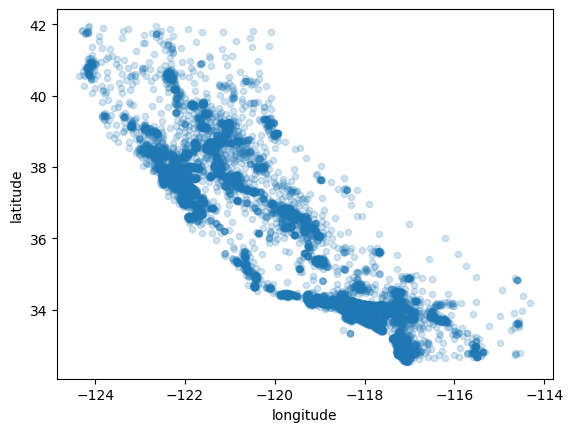

In [9]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha =0.2);

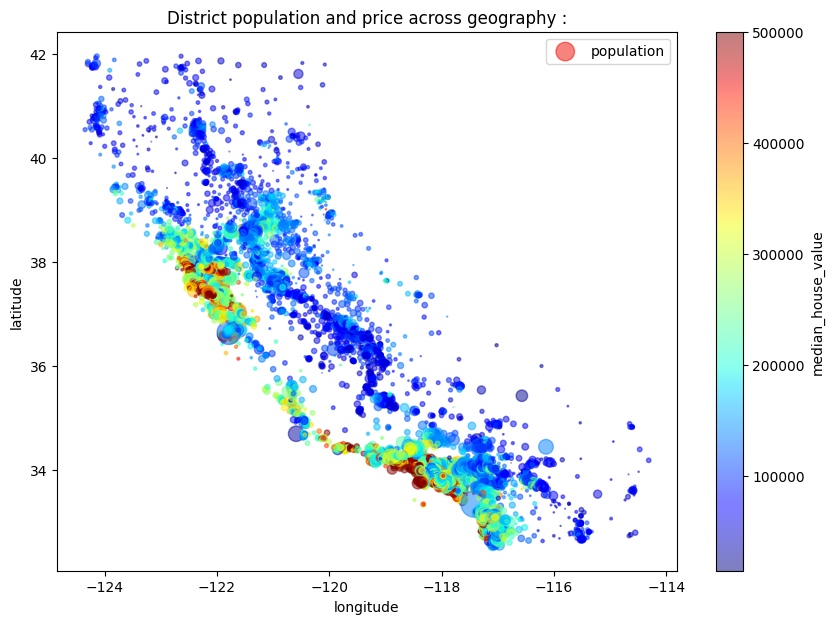

In [10]:
data.plot(kind = 'scatter', x='longitude', y='latitude', alpha=0.5 , 
          s = data['population']/100, label = 'population', figsize = (10,7), c = "median_house_value",
         cmap = plt.get_cmap("jet"), colorbar = True)
plt.title("District population and price across geography :")
plt.legend();

In [11]:
corr_mat = data.corr()
corr_mat

C:\Users\ayush\AppData\Local\Temp\ipykernel_60320\2083231324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [12]:
corr_mat['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [13]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income' , 'total_rooms', 'housing_median_age']

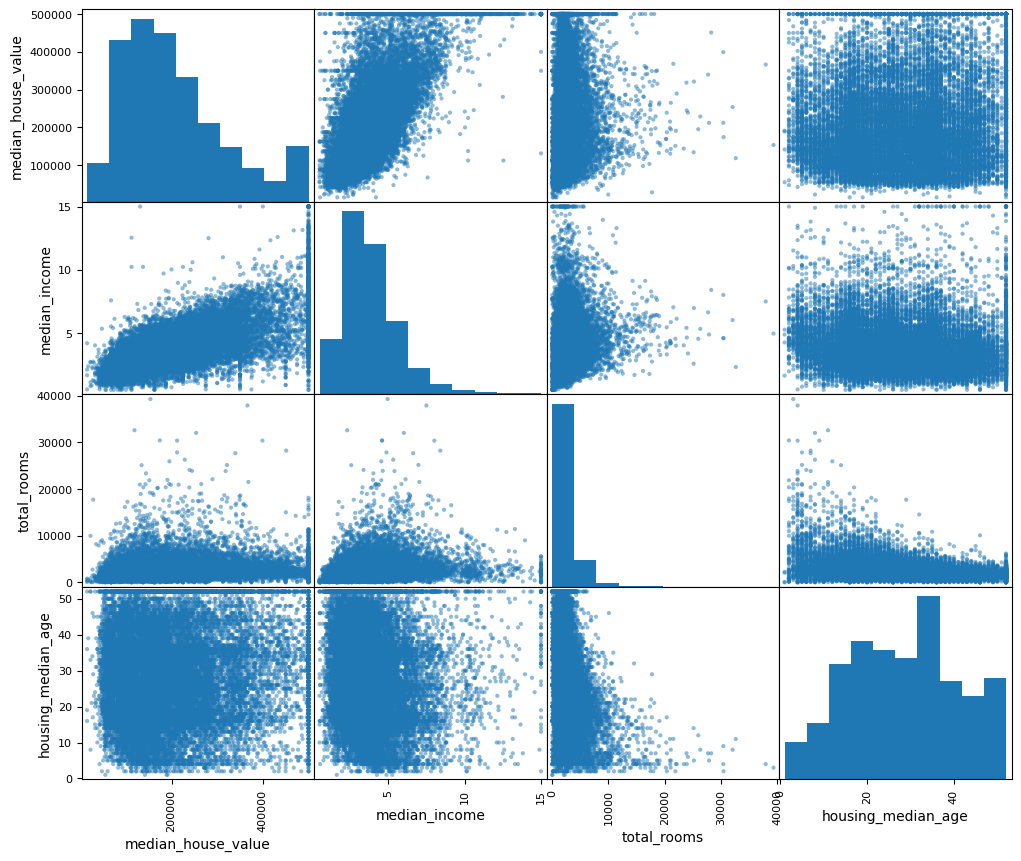

In [14]:
scatter_matrix(data[attributes], figsize = (12, 10));

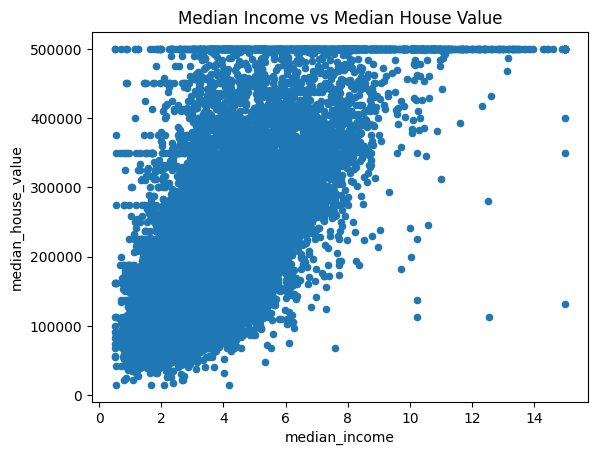

In [15]:
data.plot(kind = 'scatter', x='median_income', y='median_house_value')
plt.title("Median Income vs Median House Value");

## Data Splitting

In [16]:
# Split the data

X = data.drop('median_house_value', axis =1)
y = data['median_house_value']

X.shape, y.shape

((20640, 9), (20640,))

In [17]:
X_train, X_test, y_train, y_test = tt_split(X, y, test_size =0.2, random_state =42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


## Data Preprocessing

### For numeric we do :
    1. Imputer (median)
    2. Scaling

In [18]:
data_num = X_train.select_dtypes([np.number]).columns
data_num

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [19]:
num_impute = SimpleImputer(strategy='median')
num_scaler = StandardScaler()

### For categorical we do :
    1. Imputer (most_frequent)
    2. OneHotEncoding

In [20]:
data_cat = X_train.select_dtypes(['object']).columns
data_cat

Index(['ocean_proximity'], dtype='object')

In [21]:
cat_impute = SimpleImputer(strategy= 'most_frequent')
cat_encode = OneHotEncoder()

## Pipeline And Column Transform

In [22]:
# Pipeline
num_pipeline = Pipeline(steps = [('num_impute', num_impute),
                       ('num_scaler', num_scaler)])

cat_pipeline = Pipeline(steps = [('cat_impute', cat_impute),
                                ('cat_encode', cat_encode)])

In [23]:
# Column Tranform 
preprocessor = ColumnTransformer(transformers=[('num_pipeline', num_pipeline, data_num),
                                              ('cat_pipeline', cat_pipeline, data_cat)])



## Full Pipeline (Model +  Preprocessing)

In [24]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

In [25]:
full_pipeline = Pipeline(steps = [("preprocessing", preprocessor),
                                 ('model_fit', lin_model)])

In [26]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encode',
                                                                   OneHotEncoder())]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('model_fit', LinearRegression())])

## Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cv_score = cross_val_score(
        full_pipeline,
    X_train, y_train,
    cv=5, scoring='neg_root_mean_squared_error'
)

In [29]:
rmse = -cv_score
print("All the RMSE is : ", rmse)
print("Mean RMSE is  : " , rmse.mean())

All the RMSE is :  [68721.65876664 67485.36849682 67641.76081141 67893.04481481
 71370.84352754]
Mean RMSE is  :  68622.53528344534


## Evaluate on Test

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
def evaluate_test(pipeline, X_test, y_test):
    predictions = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [32]:
line_test_rmse = evaluate_test(full_pipeline, X_test, y_test)
print("Test RMSE for Linear Regression  is : " , line_test_rmse)

Test RMSE for Linear Regression  is :  70059.19333925014


## Ridge Model Experiment

In [33]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

In [34]:
ridge_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('ridge_model', ridge_model)
])

In [35]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encode',
                                                                   OneHotEncoder())]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('ridge_model', Ridge())])

In [36]:
ridge_cv = cross_val_score(
    ridge_pipeline,
    X_train, y_train,
    cv =5,
    scoring='neg_root_mean_squared_error'
)

In [37]:
ridge_rmse = -ridge_cv

print("All the RMSE for Ridge  is : ", ridge_rmse)
print("Mean RMSE for Ridge is  : " , ridge_rmse.mean())

All the RMSE for Ridge  is :  [68715.03190871 67485.70855273 67659.8584323  67871.86925705
 71375.93511961]
Mean RMSE for Ridge is  :  68621.68065408066


In [38]:
ridge_test_rmse = evaluate_test(ridge_pipeline, X_test, y_test)
print("Test RMSE for Ridge is : ", ridge_test_rmse)

Test RMSE for Ridge is :  70066.0211209325
